<a href="https://colab.research.google.com/github/Olena-24/Science-HW/blob/main/HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, GRU, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
# Завантаження та підготовка даних
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [11]:
# Коллбеки
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)

In [12]:
def plot_acc_loss_history(history, title=""):
    sns.set(style="whitegrid")

    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], 'o-', label='Training Accuracy', color='blue')
    plt.plot(epochs, history.history['val_accuracy'], 'o-', label='Validation Accuracy', color='green')
    plt.fill_between(epochs, history.history['accuracy'], history.history['val_accuracy'], color='gray', alpha=0.1)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'o-', label='Training Loss', color='blue')
    plt.plot(epochs, history.history['val_loss'], 'o-', label='Validation Loss', color='green')
    plt.fill_between(epochs, history.history['loss'], history.history['val_loss'], color='gray', alpha=0.1)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    if title:
        plt.suptitle(title, fontsize=16)
    plt.show()


In [13]:
def make_predictions(model, name: str):
    predictions = model.predict(input_test)

    # Перетворення прогнозів в бінарний формат
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    # Вивід деяких прогнозованих значень поряд з фактичними значеннями
    for i in range(10):
        print(f"Predicted: {binary_predictions[i]}, Actual: {y_test[i]}")

    # Оцінка моделі
    test_loss, test_acc = model.evaluate(input_test, y_test)
    print(name, ' Test Loss: {}'.format(test_loss))
    print(name, ' Test Accuracy: {}'.format(test_acc))
    return test_loss, test_acc

In [14]:

# Словник для зберігання результатів моделей
results = {}


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 256ms/step - accuracy: 0.5370 - loss: 0.6882 - val_accuracy: 0.6120 - val_loss: 0.6454 - learning_rate: 0.0010
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 188s 234ms/step - accuracy: 0.6851 - loss: 0.5999 - val_accuracy: 0.6444 - val_loss: 0.6282 - learning_rate: 0.0010
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 235ms/step - accuracy: 0.7374 - loss: 0.5186 - val_accuracy: 0.6904 - val_loss: 0.5991 - learning_rate: 0.0010
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 234ms/step - accuracy: 0.8060 - loss: 0.4280 - val_accuracy: 0.6472 - val_loss: 0.6217 - learning_rate: 0.0010
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 238ms/step - accuracy: 0.8015 - loss: 0.4450 - val_accuracy: 0.7326 - val_loss: 0.5684 - learning_rate: 0.0010


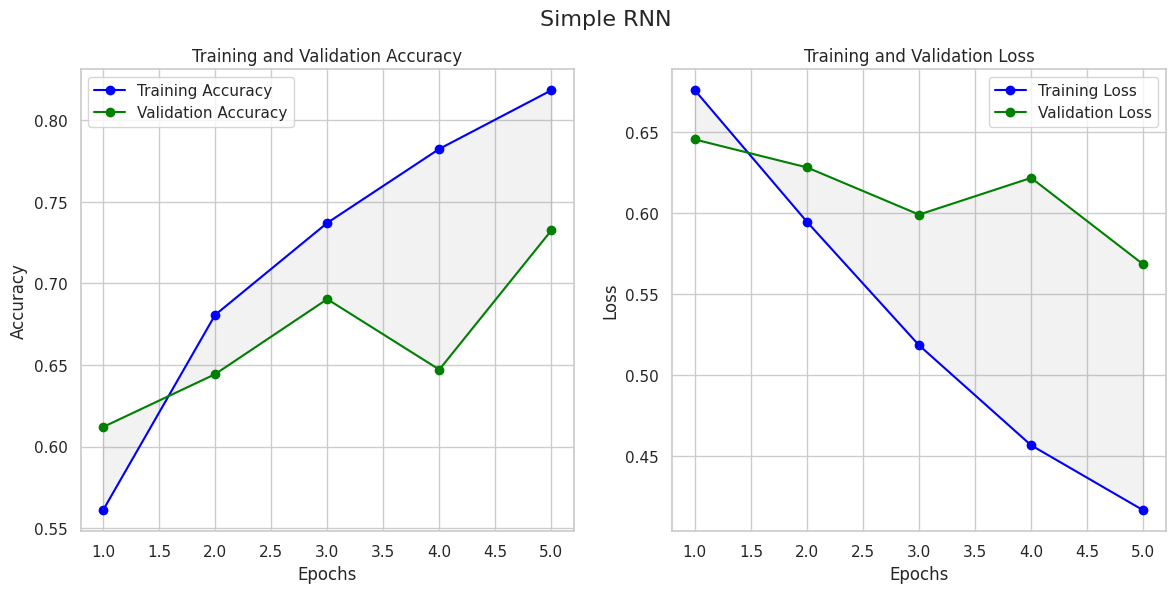

782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.6161 - loss: 0.6468
Simple RNN  Test Loss: 0.6457109451293945
Simple RNN  Test Accuracy: 0.6146799921989441


In [18]:
# Модель 1: Проста RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 128))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
plot_acc_loss_history(history_rnn, title="Simple RNN")
results['Simple RNN'] = make_predictions(model_rnn, "Simple RNN")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 599s 954ms/step - accuracy: 0.7022 - loss: 0.5554 - val_accuracy: 0.8360 - val_loss: 0.3791 - learning_rate: 0.0010
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 593s 948ms/step - accuracy: 0.8739 - loss: 0.3117 - val_accuracy: 0.8294 - val_loss: 0.3674 - learning_rate: 0.0010
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 624s 952ms/step - accuracy: 0.9022 - loss: 0.2443 - val_accuracy: 0.8402 - val_loss: 0.3987 - learning_rate: 0.0010
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 599s 958ms/step - accuracy: 0.9232 - loss: 0.2080 - val_accuracy: 0.8386 - val_loss: 0.3916 - learning_rate: 0.0010
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 657s 1s/step - accuracy: 0.9465 - loss: 0.1478 - val_accuracy: 0.8560 - val_loss: 0.4000 - learning_rate: 0.0010


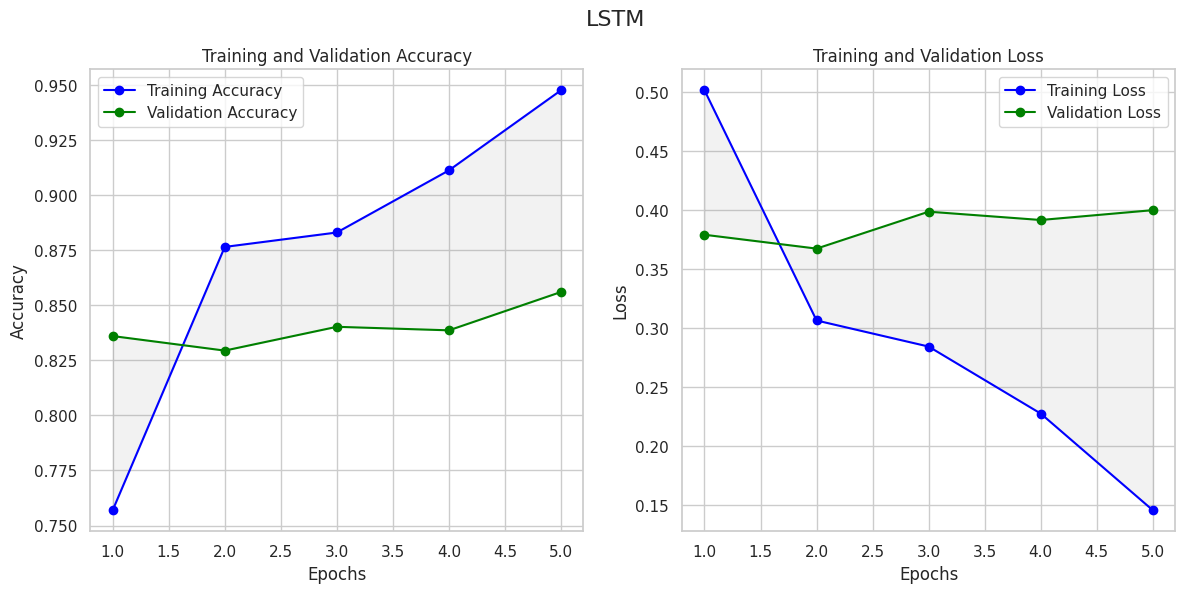

782/782 ━━━━━━━━━━━━━━━━━━━━ 221s 283ms/step
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 222s 283ms/step - accuracy: 0.8358 - loss: 0.3694
LSTM  Test Loss: 0.367888480424881
LSTM  Test Accuracy: 0.8377199769020081


In [19]:
# Модель 2: LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 128))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
plot_acc_loss_history(history_lstm, title="LSTM")
results['LSTM'] = make_predictions(model_lstm, "LSTM")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1150s 2s/step - accuracy: 0.6963 - loss: 0.5571 - val_accuracy: 0.8038 - val_loss: 0.4245 - learning_rate: 0.0010
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1139s 2s/step - accuracy: 0.8623 - loss: 0.3341 - val_accuracy: 0.8146 - val_loss: 0.4563 - learning_rate: 0.0010
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1167s 2s/step - accuracy: 0.8513 - loss: 0.3415 - val_accuracy: 0.7800 - val_loss: 0.5292 - learning_rate: 0.0010
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1155s 2s/step - accuracy: 0.8641 - loss: 0.3192 - val_accuracy: 0.8510 - val_loss: 0.3685 - learning_rate: 0.0010
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1169s 2s/step - accuracy: 0.9247 - loss: 0.2011 - val_accuracy: 0.8666 - val_loss: 0.3410 - learning_rate: 0.0010


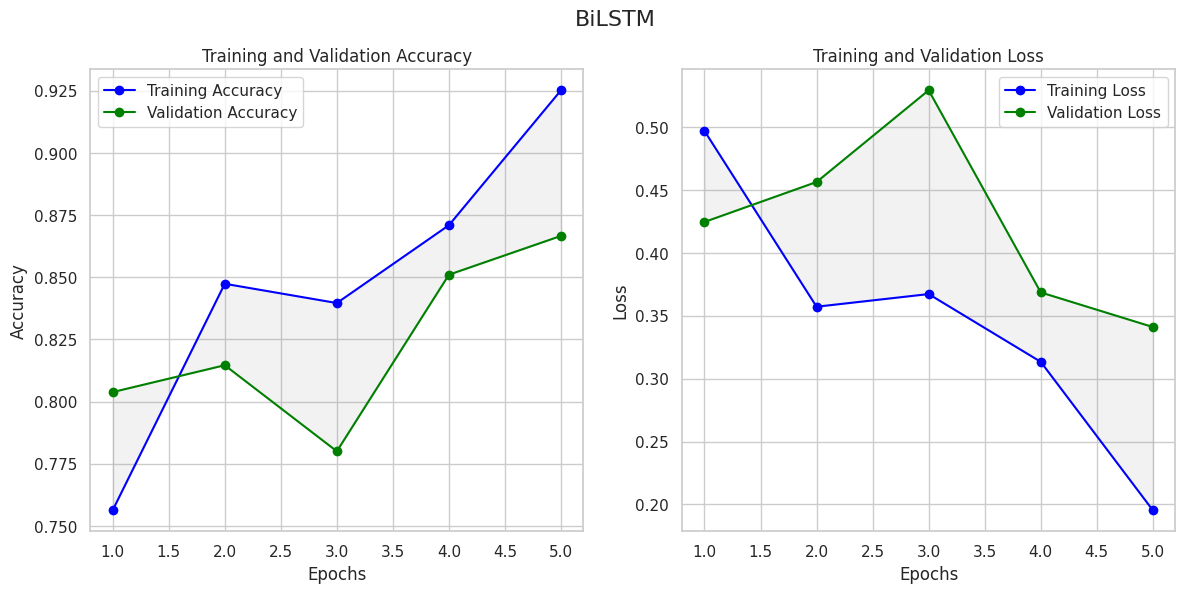

782/782 ━━━━━━━━━━━━━━━━━━━━ 417s 533ms/step
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 411s 525ms/step - accuracy: 0.8597 - loss: 0.3536
BiLSTM  Test Loss: 0.34485113620758057
BiLSTM  Test Accuracy: 0.8615599870681763


In [20]:
# Модель 3: Двостороння LSTM
model_bilstm = Sequential()
model_bilstm.add(Embedding(max_features, 128))
model_bilstm.add(Bidirectional(LSTM(128)))
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bilstm = model_bilstm.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
plot_acc_loss_history(history_bilstm, title="BiLSTM")
results['BiLSTM'] = make_predictions(model_bilstm, "BiLSTM")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1176s 2s/step - accuracy: 0.6854 - loss: 0.5687 - val_accuracy: 0.8042 - val_loss: 0.4448 - learning_rate: 0.0010
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1281s 2s/step - accuracy: 0.8795 - loss: 0.3017 - val_accuracy: 0.8436 - val_loss: 0.3620 - learning_rate: 0.0010
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1224s 2s/step - accuracy: 0.9241 - loss: 0.2064 - val_accuracy: 0.8636 - val_loss: 0.3344 - learning_rate: 0.0010
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1224s 2s/step - accuracy: 0.9429 - loss: 0.1580 - val_accuracy: 0.8310 - val_loss: 0.4003 - learning_rate: 0.0010
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1280s 2s/step - accuracy: 0.9502 - loss: 0.1349 - val_accuracy: 0.8104 - val_loss: 0.4377 - learning_rate: 0.0010


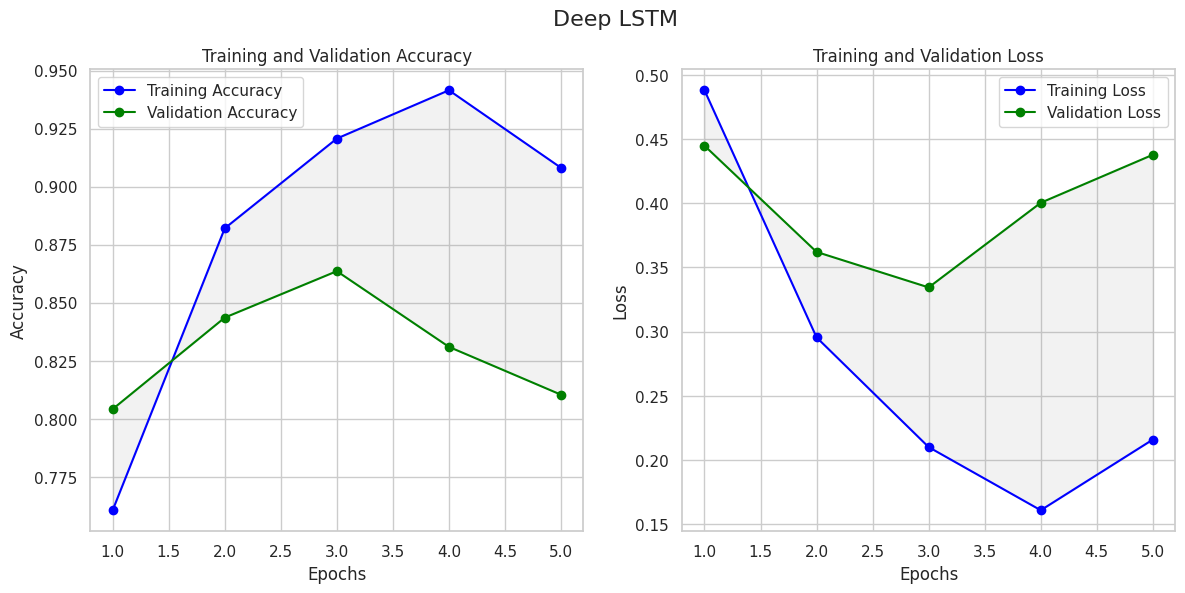

782/782 ━━━━━━━━━━━━━━━━━━━━ 432s 552ms/step
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 434s 555ms/step - accuracy: 0.8646 - loss: 0.3408
Deep LSTM  Test Loss: 0.33616578578948975
Deep LSTM  Test Accuracy: 0.8651599884033203


In [21]:
# Модель 4: Глибока модель з декількома LSTM шарами
model_deep = Sequential()
model_deep.add(Embedding(max_features, 128))
model_deep.add(LSTM(128, return_sequences=True))
model_deep.add(LSTM(128))
model_deep.add(Dense(1, activation='sigmoid'))

model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_deep = model_deep.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
plot_acc_loss_history(history_deep, title="Deep LSTM")
results['Deep LSTM'] = make_predictions(model_deep, "Deep LSTM")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 474s 755ms/step - accuracy: 0.6745 - loss: 0.5714 - val_accuracy: 0.8630 - val_loss: 0.3354 - learning_rate: 0.0010
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 517s 779ms/step - accuracy: 0.8740 - loss: 0.3114 - val_accuracy: 0.8940 - val_loss: 0.2808 - learning_rate: 0.0010
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 488s 781ms/step - accuracy: 0.9437 - loss: 0.1549 - val_accuracy: 0.8888 - val_loss: 0.2737 - learning_rate: 0.0010
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 481s 747ms/step - accuracy: 0.9742 - loss: 0.0779 - val_accuracy: 0.8796 - val_loss: 0.3926 - learning_rate: 0.0010
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 520s 775ms/step - accuracy: 0.9864 - loss: 0.0426 - val_accuracy: 0.8724 - val_loss: 0.4522 - learning_rate: 0.0010


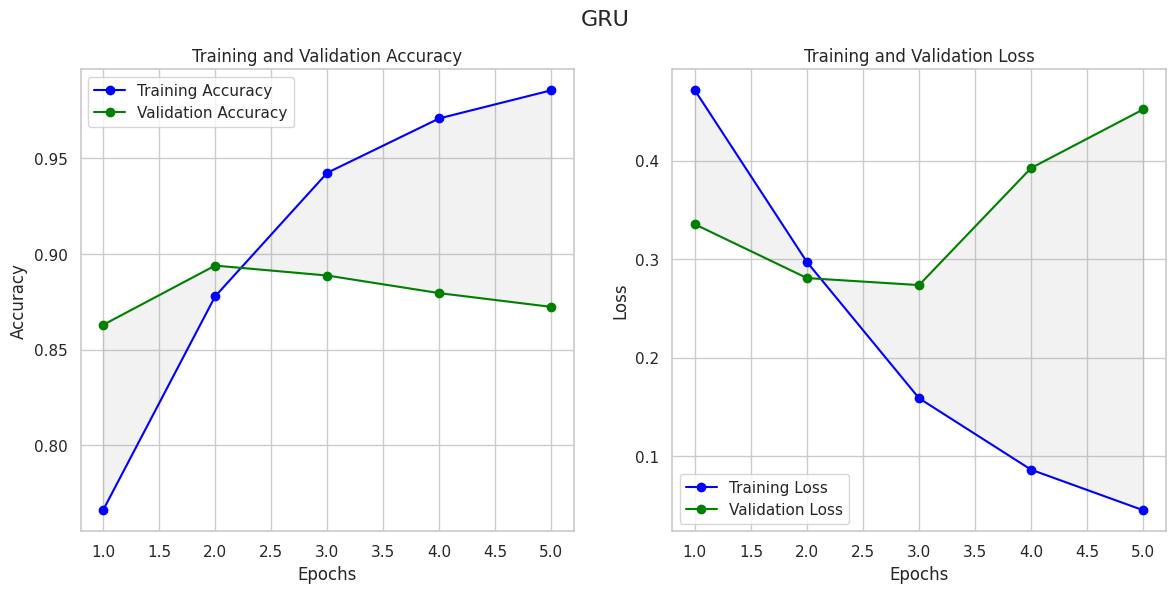

782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.8806 - loss: 0.2976
GRU  Test Loss: 0.2913771867752075
GRU  Test Accuracy: 0.8829200267791748


In [22]:
# Модель 5: GRU
model_gru = Sequential()
model_gru.add(Embedding(max_features, 128))
model_gru.add(GRU(128))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = model_gru.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
plot_acc_loss_history(history_gru, title="GRU")
results['GRU'] = make_predictions(model_gru, "GRU")

In [23]:
# Створення таблиці з результатами
results_df = pd.DataFrame(results, index=['Test Loss', 'Test Accuracy']).T
print(results_df)

            Test Loss  Test Accuracy
Simple RNN   0.645711        0.61468
LSTM         0.367888        0.83772
BiLSTM       0.344851        0.86156
Deep LSTM    0.336166        0.86516
GRU          0.291377        0.88292


In [24]:
# Висновки
print("\nВисновки:")
best_model = results_df['Test Accuracy'].idxmax()
print(f"Найкраща модель: {best_model} з точністю {results_df.loc[best_model, 'Test Accuracy']:.4f}")



Висновки:
Найкраща модель: GRU з точністю 0.8829


In [25]:
# Додатковий аналіз: різниця в точності між моделями
results_df['Accuracy Difference from Best'] = results_df['Test Accuracy'] - results_df.loc[best_model, 'Test Accuracy']
print("\nРізниця в точності між моделями:")
print(results_df)


Різниця в точності між моделями:
            Test Loss  Test Accuracy  Accuracy Difference from Best
Simple RNN   0.645711        0.61468                       -0.26824
LSTM         0.367888        0.83772                       -0.04520
BiLSTM       0.344851        0.86156                       -0.02136
Deep LSTM    0.336166        0.86516                       -0.01776
GRU          0.291377        0.88292                        0.00000
